In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
import seaborn as sns 
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
trainData = pd.read_csv('SalaryData_Train.csv')
testData = pd.read_csv('SalaryData_Test.csv')

In [3]:
trainData.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# encoding of categorical data
# is necessary
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
# features with categorical data 
cols = [x for x in trainData.columns if trainData[x].dtype == 'object']
cols 

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

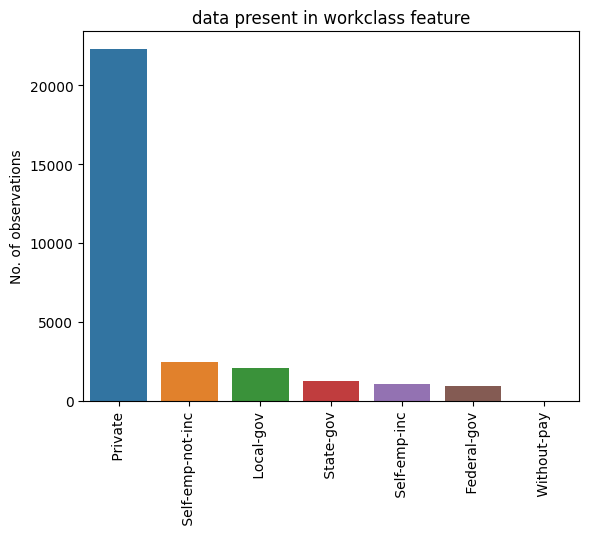

In [6]:
n = trainData['workclass'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in workclass feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

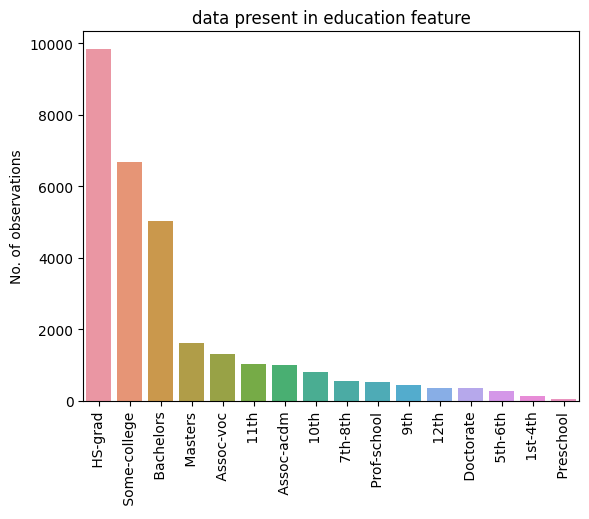

In [7]:
n = trainData['education'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in education feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

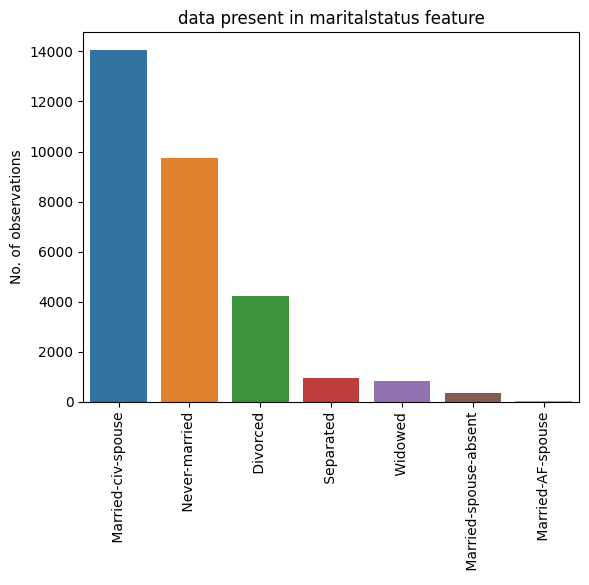

In [8]:
n = trainData['maritalstatus'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in maritalstatus feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

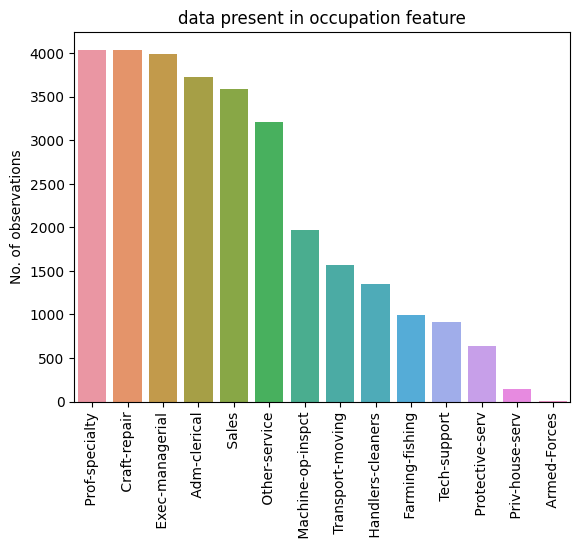

In [9]:
n = trainData['occupation'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in occupation feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

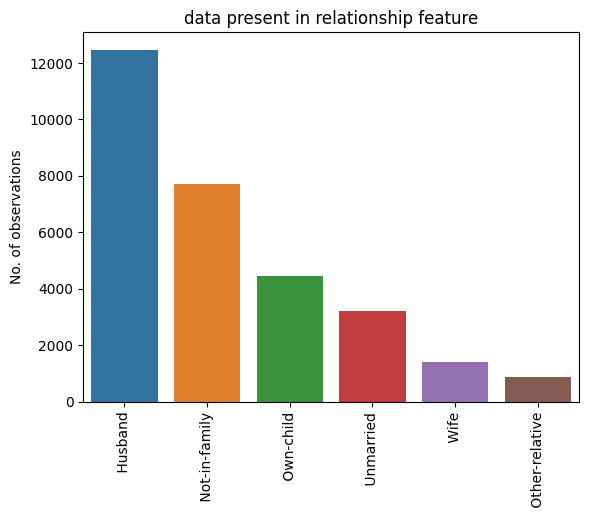

In [10]:
n = trainData['relationship'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in relationship feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

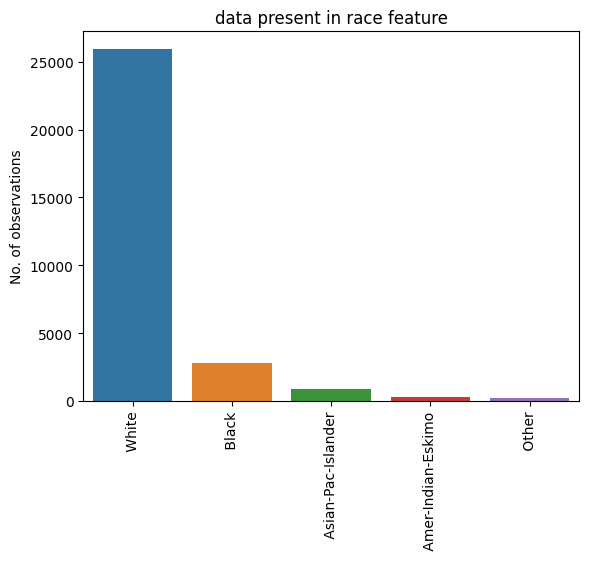

In [11]:
n = trainData['race'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in race feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

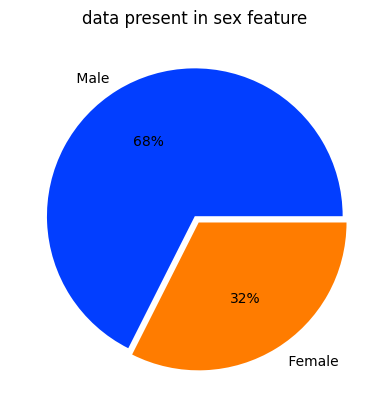

In [12]:
n = trainData[['sex']].value_counts()
explode = [0,0.05]
plt.pie(n.values,labels=[i[0] for i in n.index],explode=explode,
        colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title('data present in sex feature')
plt.show()

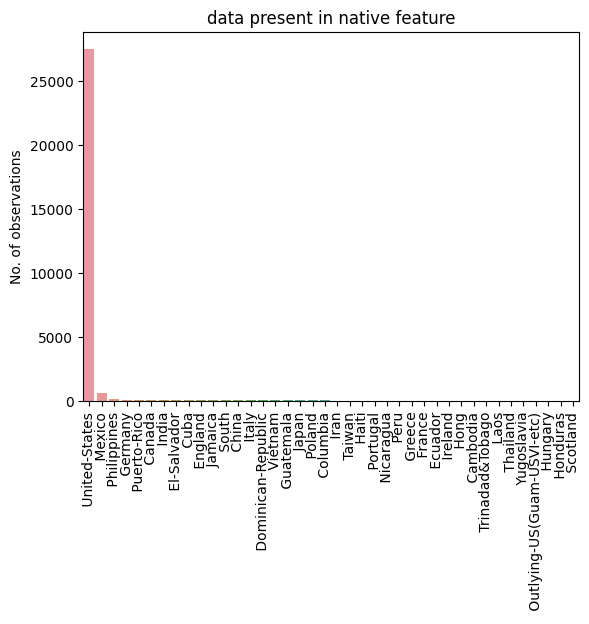

In [13]:
n = trainData['native'].value_counts()
sns.barplot(x=n.index,y=n.values)
plt.title('data present in native feature')
plt.ylabel('No. of observations')
plt.xticks(rotation=90)
plt.show()

In [14]:
# training data 
# normalizing feature data
encX_train = pd.get_dummies(trainData.iloc[:,:-1])
norm = MinMaxScaler(feature_range=(0,1))
normX_train = pd.DataFrame(norm.fit_transform(encX_train),
                          columns=encX_train.columns)
normX_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


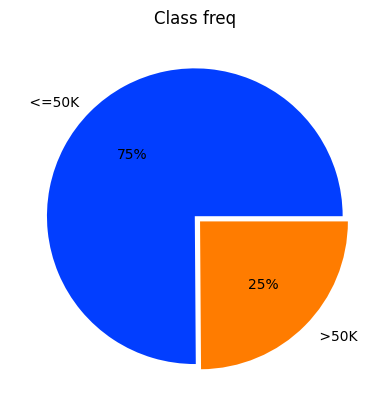

In [15]:
# target contains 2 unique classes
# there is imbalance in target data 
# don't rely on accuracy for model evaluation
n = trainData[['Salary']].value_counts()
explode = [0,0.05]
plt.pie(n.values,labels=[i[0] for i in n.index],explode=explode,
        colors=sns.color_palette('bright'),autopct='%.0f%%')

plt.title('Class freq')
plt.show()

In [16]:
lEnc = LabelEncoder()
encY_train = pd.DataFrame(lEnc.fit_transform(trainData['Salary']),
                          columns=['>50K'])
encY_train.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [17]:
# hyperparamter tuning of SVC
# set random state for reproducible results
clf = SVC(random_state=42)
param_grid = [{'kernel':['linear','rbf'],   # kernel params 
               'gamma':[0.1,5],         # gamma params
               'C':[0.1,5]}]             # C params
grid = GridSearchCV(clf,param_grid,verbose=10)
grid.fit(normX_train,encY_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START C=0.1, gamma=0.1, kernel=linear.............................
[CV 1/5; 1/8] END C=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=  35.5s
[CV 2/5; 1/8] START C=0.1, gamma=0.1, kernel=linear.............................
[CV 2/5; 1/8] END C=0.1, gamma=0.1, kernel=linear;, score=0.833 total time=  34.7s
[CV 3/5; 1/8] START C=0.1, gamma=0.1, kernel=linear.............................
[CV 3/5; 1/8] END C=0.1, gamma=0.1, kernel=linear;, score=0.837 total time=  38.8s
[CV 4/5; 1/8] START C=0.1, gamma=0.1, kernel=linear.............................
[CV 4/5; 1/8] END C=0.1, gamma=0.1, kernel=linear;, score=0.844 total time=  40.0s
[CV 5/5; 1/8] START C=0.1, gamma=0.1, kernel=linear.............................
[CV 5/5; 1/8] END C=0.1, gamma=0.1, kernel=linear;, score=0.837 total time=  42.0s
[CV 1/5; 2/8] START C=0.1, gamma=0.1, kernel=rbf................................
[CV 1/5; 2/8] END .C=0.1, gamma=0.1, ke

GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 5], 'gamma': [0.1, 5],
                          'kernel': ['linear', 'rbf']}],
             verbose=10)

In [18]:
# parameter giving best score 
print(f'Model gives Best Score : {round(grid.best_score_,2)}\nWith params :\nC : {grid.best_params_["C"]}\ngamma : {grid.best_params_["gamma"]}\nkernel : {grid.best_params_["kernel"]}')

Model gives Best Score : 0.85
With params :
C : 5
gamma : 0.1
kernel : linear


In [19]:
# model score after hyperparameter optimization 
grid.best_score_

0.8464906541871168

## Training 

In [20]:
# SVC with best parameters 
optmCLF = SVC(C=5,gamma=0.1,kernel='linear',random_state=42)

In [21]:
optmCLF.fit(normX_train,encY_train.values.ravel())

SVC(C=5, gamma=0.1, kernel='linear', random_state=42)

In [22]:
# prediction using training feature data 
train_pred = optmCLF.predict(normX_train)

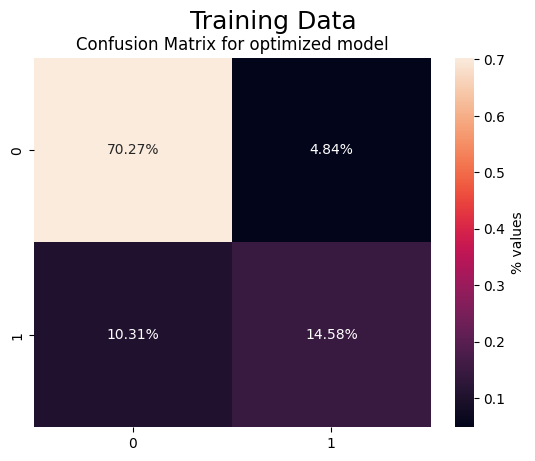

In [23]:
sns.heatmap(confusion_matrix(encY_train,train_pred,normalize='all'),
            annot=True,cbar_kws={'label':'% values'},fmt='.2%')
plt.title('Confusion Matrix for optimized model')
plt.suptitle('Training Data',fontsize=18)
plt.show()

In [24]:
# classification report for training 
print(classification_report(encY_train,train_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22653
           1       0.75      0.59      0.66      7508

    accuracy                           0.85     30161
   macro avg       0.81      0.76      0.78     30161
weighted avg       0.84      0.85      0.84     30161



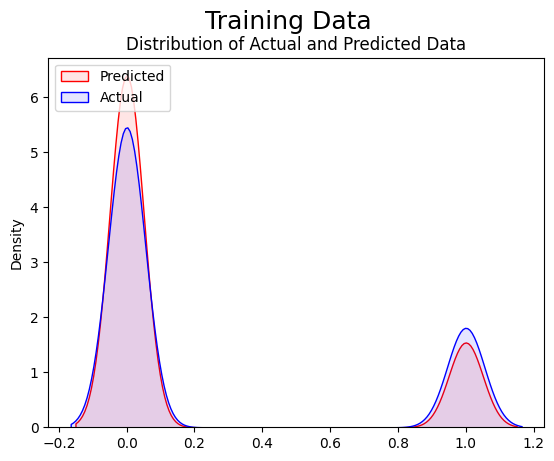

In [25]:
p = sns.distplot(train_pred,hist=False,color='red',
                 kde_kws={'shade':True,'alpha':0.1})
a = sns.distplot(encY_train.values.ravel(),hist=False,color='blue',
                 kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper left')
plt.title('Distribution of Actual and Predicted Data')
plt.suptitle('Training Data',fontsize=18)
plt.show()

In [26]:
print(f'Training Accuracy : {round(accuracy_score(encY_train,train_pred)*100,2)}%\nTraining F1 score : 84 %')

Training Accuracy : 84.85%
Training F1 score : 84 %


## Testing 

In [27]:
# testing data
testData.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [28]:
# testing data
# normalizing feature data
encX_test = pd.get_dummies(testData.iloc[:,:-1])
norm = MinMaxScaler(feature_range=(0,1))
normX_test = pd.DataFrame(norm.fit_transform(encX_test),
                          columns=encX_test.columns)
normX_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.333333,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
lEnc = LabelEncoder()
encY_test = pd.DataFrame(lEnc.fit_transform(testData['Salary']),
                          columns=['>50K'])
encY_test.head()

,>50K
0,0
1,0
2,1
3,1
4,0


In [30]:
# prediction using testing feature data 
test_pred = optmCLF.predict(normX_test)

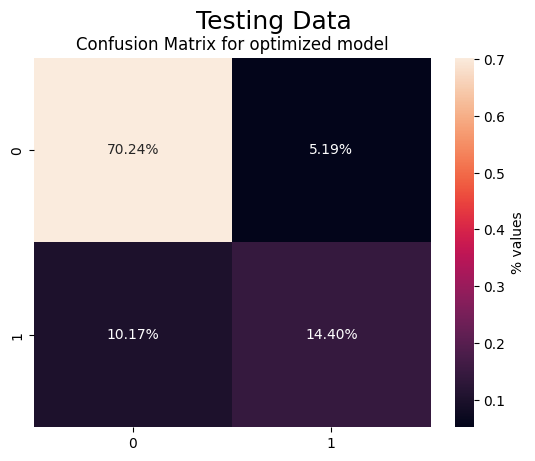

In [31]:
sns.heatmap(confusion_matrix(encY_test,test_pred,normalize='all'),
            annot=True,cbar_kws={'label':'% values'},fmt='.2%')
plt.title('Confusion Matrix for optimized model')
plt.suptitle('Testing Data',fontsize=18)
plt.show()

In [32]:
# classification report for testing 
print(classification_report(encY_test,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11360
           1       0.74      0.59      0.65      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.76      0.78     15060
weighted avg       0.84      0.85      0.84     15060



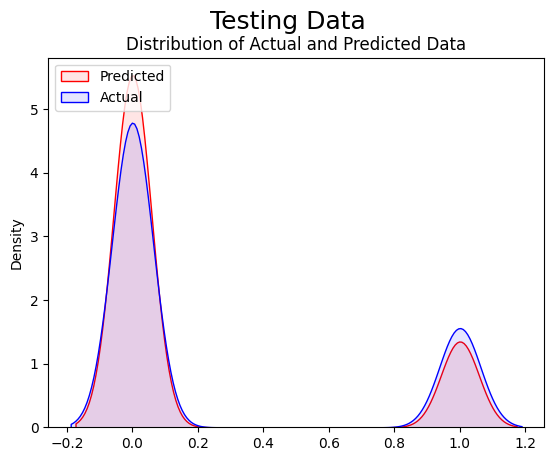

In [33]:
p = sns.distplot(test_pred,hist=False,color='red',
                 kde_kws={'shade':True,'alpha':0.1})
a = sns.distplot(encY_test.values.ravel(),hist=False,color='blue',
                 kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper left')
plt.title('Distribution of Actual and Predicted Data')
plt.suptitle('Testing Data',fontsize=18)
plt.show()

In [34]:
print(f'Testing Accuracy : {round(accuracy_score(encY_test,test_pred)*100,2)}%\nTesting F1 score : 84 %')

Testing Accuracy : 84.64%
Testing F1 score : 84 %


## SVM Classifier with training and testing F1 score of 84 % 